In [2]:
!pip install sklearn
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to /Users/colin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/colin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/colin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.corpus import wordnet as wn
poses = {'n': 'noun', 'v': 'verb', 's': 'adj(s)', 'a':'adj', 'r':'adv'}
for synset in wn.synsets('good'):
    print('{}: {}'.format(poses[synset.pos()], ', '.join([l.name() for l in synset.lemmas()])))

noun: good
noun: good, goodness
noun: good, goodness
noun: commodity, trade_good, good
adj: good
adj(s): full, good
adj: good
adj(s): estimable, good, honorable, respectable
adj(s): beneficial, good
adj(s): good
adj(s): good, just, upright
adj(s): adept, expert, good, practiced, proficient, skillful, skilful
adj(s): good
adj(s): dear, good, near
adj(s): dependable, good, safe, secure
adj(s): good, right, ripe
adj(s): good, well
adj(s): effective, good, in_effect, in_force
adj(s): good
adj(s): good, serious
adj(s): good, sound
adj(s): good, salutary
adj(s): good, honest
adj(s): good, undecomposed, unspoiled, unspoilt
adj(s): good
adv: well, good
adv: thoroughly, soundly, good


In [4]:
from nltk.corpus import wordnet as wn
panda = wn.synset('panda.n.01')
hyper = panda.hypernym_paths()
list(hyper)

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('animal.n.01'),
  Synset('chordate.n.01'),
  Synset('vertebrate.n.01'),
  Synset('mammal.n.01'),
  Synset('placental.n.01'),
  Synset('carnivore.n.01'),
  Synset('procyonid.n.01'),
  Synset('giant_panda.n.01')]]

In [5]:
import numpy as np

# Get the interactive Tools for Matplotlib
# %matplotlib notebook
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('/Users/colin/Documents/VS Code/glove/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

/usr/local/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
<ipython-input-5-e015796f2e16>:16: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


In [6]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.896000325679779),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933662533760071),
 ('dole', 0.7851964831352234),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472624182701111)]

In [7]:
model.most_similar('banana')

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [8]:
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119238972663879),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905653476715088),
 ('maurilio', 0.6865653991699219)]

In [9]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [10]:
result[0]

('queen', 0.7698540687561035)

In [11]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return "{}: {:.4f}".format(*result[0])

In [12]:
analogy('japan', 'japanese', 'australia')

'australian: 0.8923'

In [13]:
analogy('obama', 'clinton', 'reagan')

'nixon: 0.7845'

In [14]:
analogy('good', 'fantastic', 'bad')

'terrible: 0.7074'

In [15]:
analogy('china', 'jinping', 'cuba')

'rosalia: 0.5201'

In [16]:
print(model.doesnt_match("lumpur bangkok jakarta".split()))

bangkok


In [17]:
from random import random
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            # words = np.random.choice(list(model.vocab.keys()), sample)
            words = np.random.choice(list(model.index_to_key), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    # print(*zip(words, twodim))
    plt.figure(figsize=(12,12))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        if random() < 0.5:
            plt.text(x+0.05, y+0.05, word)
        else:
            plt.text(x+0.05, y-0.05, word)    
    plt.show()

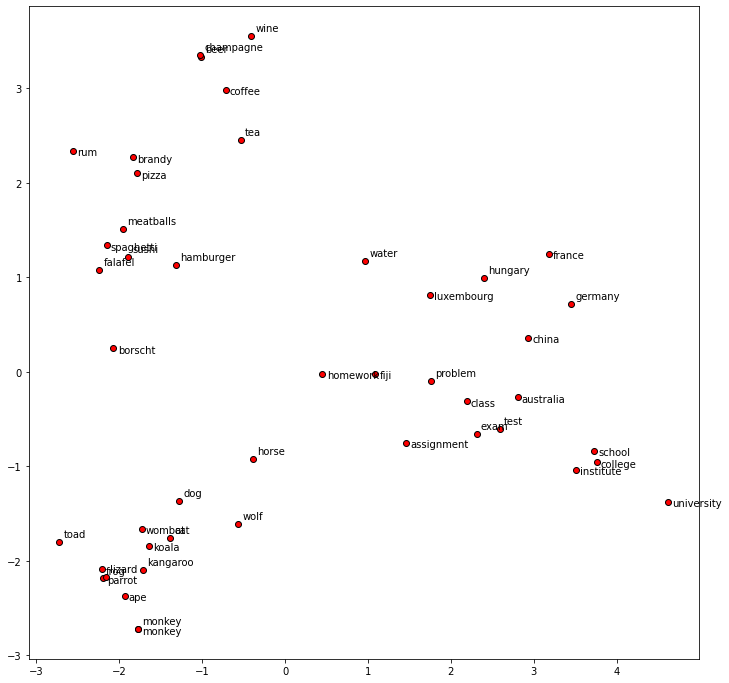

In [18]:
display_pca_scatterplot(model, 
                        words=['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

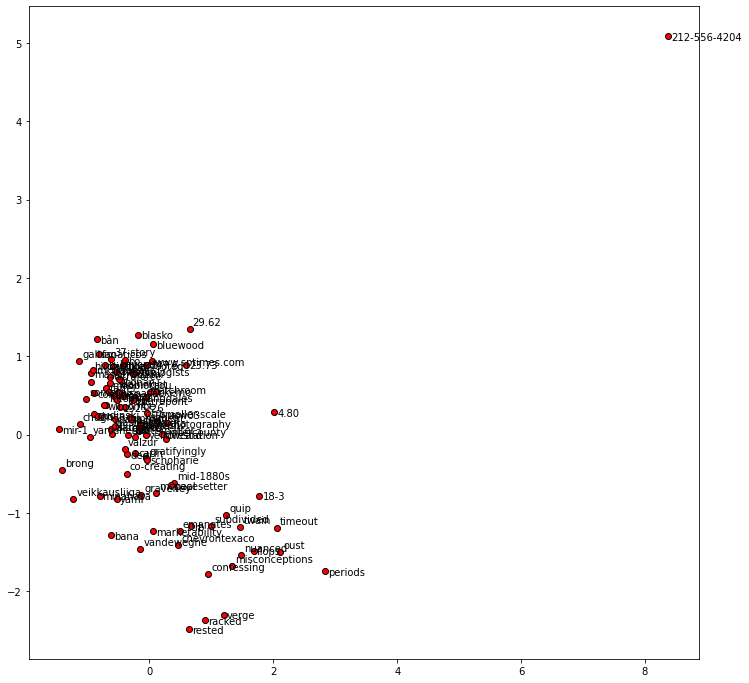

In [19]:
display_pca_scatterplot(model, sample=100)